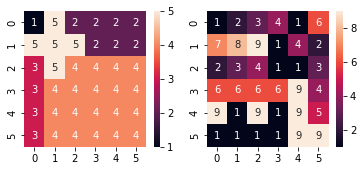

85


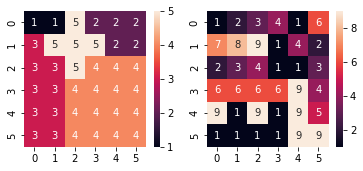

71


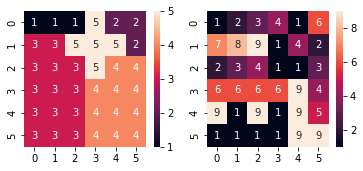

58


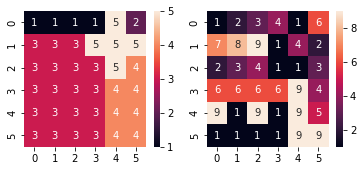

76


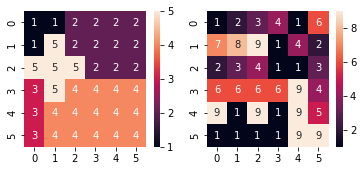

61


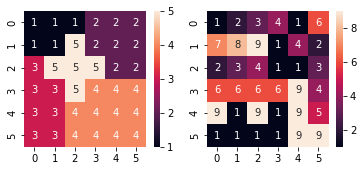

42


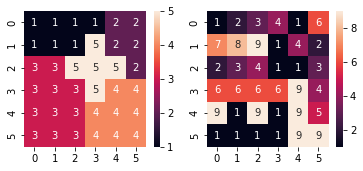

34


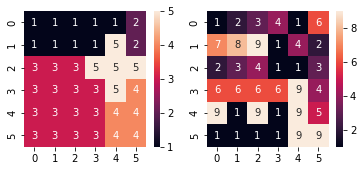

49


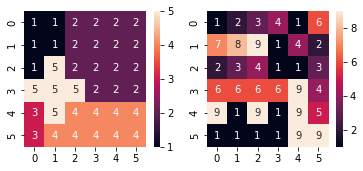

48


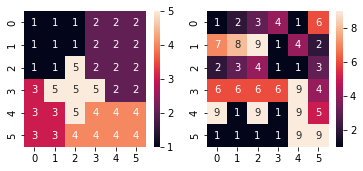

18


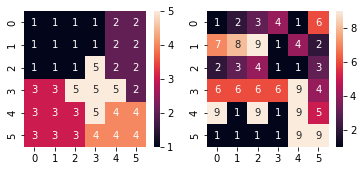

23


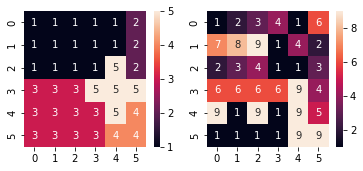

39


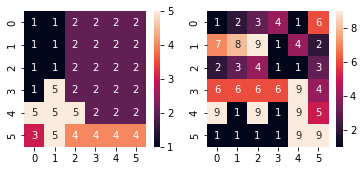

78


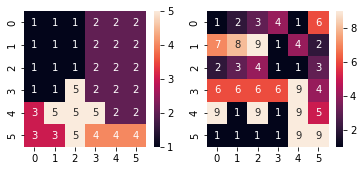

45


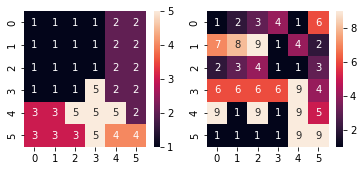

50


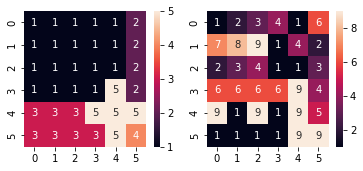

66


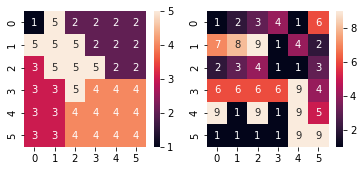

62


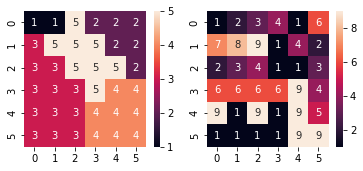

49


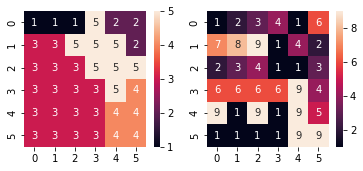

66


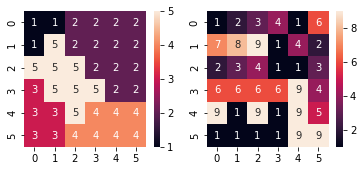

38


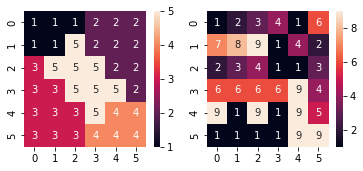

18


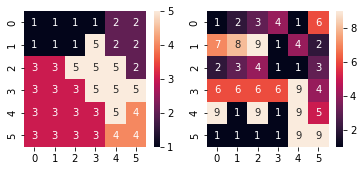

31


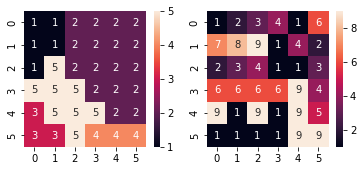

61


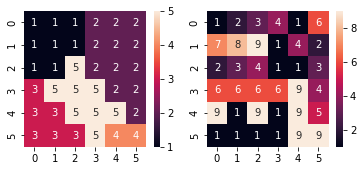

24


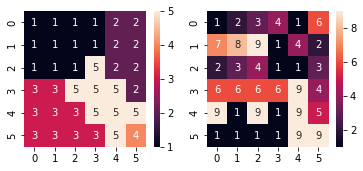

37


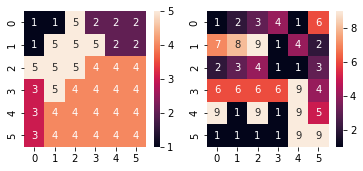

66


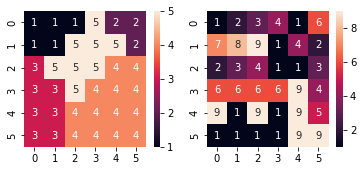

58


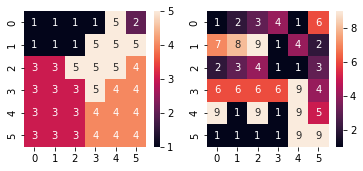

44


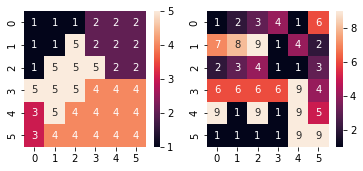

54


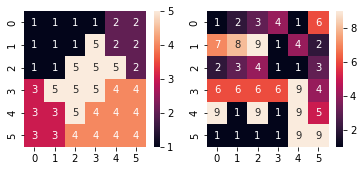

32


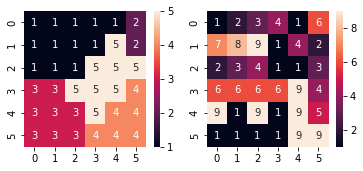

37


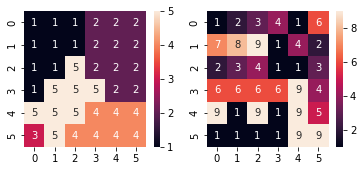

41


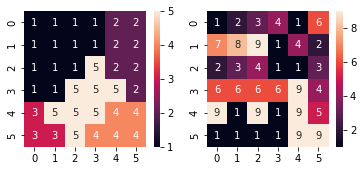

45


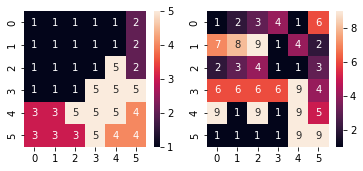

57


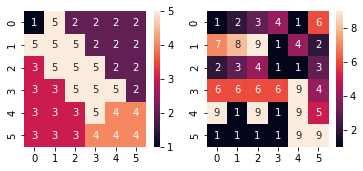

55


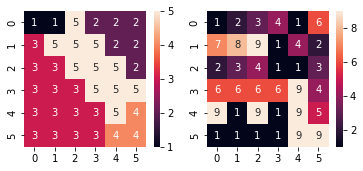

52


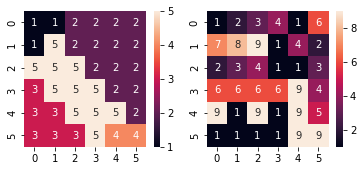

45


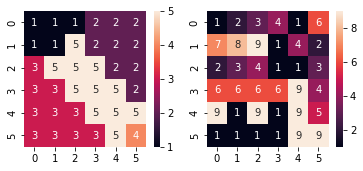

53


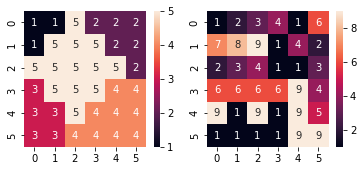

49


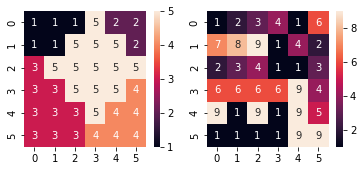

43


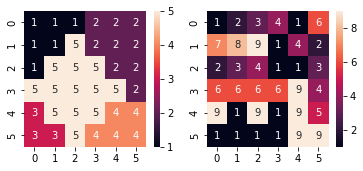

51


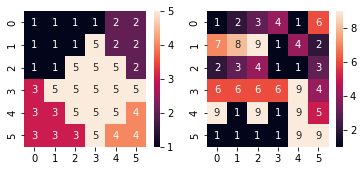

42


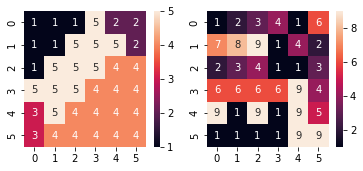

59


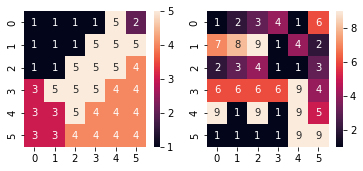

45


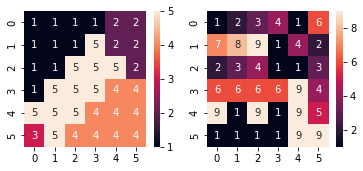

47


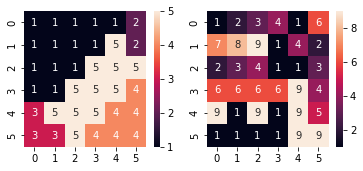

49


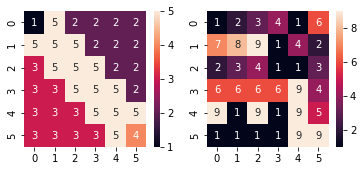

78


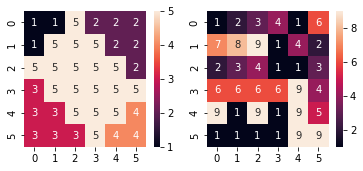

73


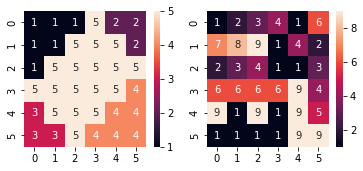

66


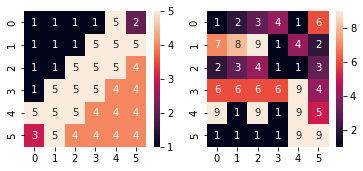

51
51


In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

N = 6
district = district_pic.tolist()

def check_dist(r, c, x, y, d1, d2):
    if (r < x+d1) & (c <= y) & (r < -c+y+x) : return 1
    elif (r <= x+d2) & (c > y) & (r < c-y+x) : return 2
    elif (r >= x+d1) & (c < y+d2-d1) & (r > c+x-y+2*d1) : return 3
    elif (r > x+d2) & (c >= y+d2-d1) & (r > -c+y+x+2*d2) : return 4
    else : return 5

def get_max_min_diff(x, y, d1, d2, district):
    pop_list = [0, 0, 0, 0, 0]
    for r in range(1, N+1):
        for c in range(1, N+1):
            dist_num = check_dist(r, c, x, y, d1, d2)
            pop_list[dist_num-1] += district[r-1][c-1]
            
    res = max(pop_list) - min(pop_list)
    return res

min_overall = 0
for d1d2 in range(2, N):
    for d1 in range(1, d1d2):
        d2 = d1d2-d1
        for x in range(1, N-d1-d2+1):
            for y in range(d1+1, N-d2+1):
                pic = np.zeros((N, N))
                for r in range(1, N+1):
                    for c in range(1, N+1):
                        dist_num = check_dist(r, c, x, y, d1, d2)
                        pic[r-1, c-1] = dist_num

                new_val = get_max_min_diff(x, y, d1, d2, district)
                if ~min_overall:
                    min_overall = new_val
                else:
                    if min_overall > new_val:
                        min_overall = new_val
                        
                print(new_val)
                plt.figure(figsize=(6,2.5))
                plt.subplot(1, 2, 1)  
                sns.heatmap(pic, annot = True)
                plt.subplot(1, 2, 2)
                sns.heatmap(district_pic, annot=True)
                plt.show()
print(min_overall)

In [17]:
type(district_pic)

numpy.ndarray